In [10]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import h5py
import support as sp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
#import urllib
#import ssl

#context=ssl._create_unverified_context()

#data=urllib.URLopener(context=context)
#data.retrieve("https://www.dropbox.com/s/iee58ulksn2kv9b/digits.hdf5?dl=1", "digits.hdf5")
#print "handwritten digit images and labels retrieved"

In [12]:
"""load digit images and labels"""
X, y = sp.loaddata('digits.hdf5')

In [13]:
"""assign data to calibration, cross-validation and test sets"""
cv_frac = 0.1
test_frac = 0.1
X_cal, y_cal, X_cv, y_cv, X_test, y_test = sp.get_sets(X, y, cv_frac, test_frac)

In [14]:
"""initialize allmodels class for selected sklearn method"""
mc = sp.allmodels('NN')
mc.get_Cvec()

In [15]:
"""perform cross validation to select the best parameter"""
acc_cv = sp.cross_validate(mc, X_cal, y_cal, X_cv, y_cv)

prediction accuracy, cross-validation data (C=1e-07): 92.2%
prediction accuracy, cross-validation data (C=1e-06): 93.0%
prediction accuracy, cross-validation data (C=1e-05): 93.2%
prediction accuracy, cross-validation data (C=0.0001): 93.2%
prediction accuracy, cross-validation data (C=0.001): 93.4%
prediction accuracy, cross-validation data (C=0.01): 93.0%
prediction accuracy, cross-validation data (C=0.1): 94.6%
prediction accuracy, cross-validation data (C=1.0): 95.8%


In [16]:
"""evaluate prediction accuracy with test data for best parameter selection"""
y_test_pred = sp.test_acc(mc, acc_cv, X_cal, y_cal, X_test, y_test)

prediction accuracy, test data (C=1.0): 95.6%


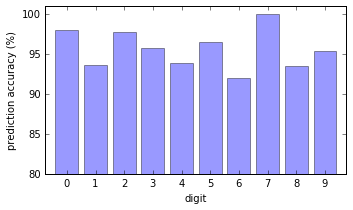

In [17]:
"""plot the prediction accuracy versus digit"""
sp.plot_acc(y_test, y_test_pred)

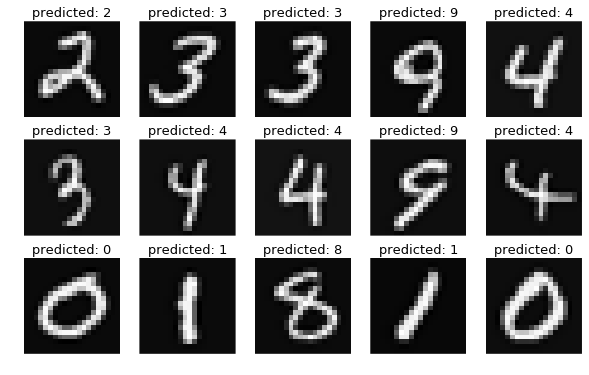

In [18]:
"""visualize success of prediction for a couple cases"""
sp.plot_prediction(X_test, y_test_pred)